<div style='background-color: orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#q1'>Question 1</a></li>
<li><a href='#q2'>Question 2</a></li>
<li><a href='#q3'>Question 3</a></li>
<li><a href='#bonus'>Bonus</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from scipy import stats

# Scaling (sklearn)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# Clustering (sklearn)
from sklearn.cluster import KMeans

# Itertools
import itertools

# Datasets
from pydataset import data

# .py files
import wrangle as w

<div style='background-color: orange'>
<a id='q1'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 1
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1a'>Question 1a</a></li>
<li><a href='#q1b'>Question 1b</a></li>
<li><a href='#q1c'>Question 1c</a></li>
<li><a href='#q1d'>Question 1d</a></li>

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')
iris.sample()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
136,7.7,3.0,6.1,2.3,virginica


<a id='q1a'></a>
### 1a. Choose features other than the ones used in the lesson.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1'>Question 1 Top</a></li>

<b>FINE!</b>

'Petal.Length' and 'Petal.Width' it is...

In [3]:
X = iris[['Petal.Length', 'Petal.Width']]

# MAKE LE THING
kmeans = KMeans(n_clusters=3)

# FIT LE THING
kmeans.fit(X)

# USE LE THING
iris['cluster'] = kmeans.predict(X)
iris.cluster

1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     2
79     1
80     1
81     1
82     1
83     1
84     2
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    2
102    2
103    2
104    2
105    2
106    2
107    1
108    2
109    2
110    2
111    2
1

---

<a id='q1b'></a>
### 1b. Visualize the results of your clustering.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1'>Question 1 Top</a></li>

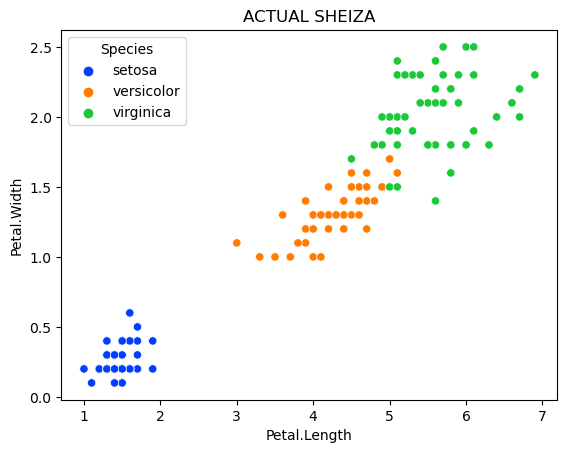

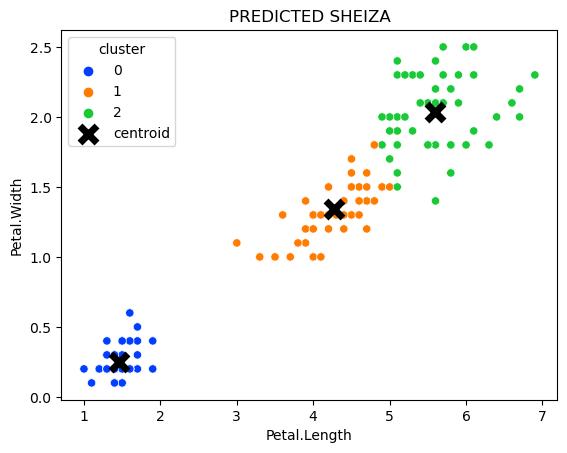

In [4]:
# VISUALIZE LE THING
sns.scatterplot(data=iris, x='Petal.Length', y='Petal.Width', hue='Species', palette='bright')
plt.title('ACTUAL SHEIZA')
plt.show()
sns.scatterplot(data=iris, x='Petal.Length', y='Petal.Width', hue='cluster', palette='bright')
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='Petal.Length', y='Petal.Width', c='black', marker='x', label='centroid', s=150, linewidths=5, ax=plt.gca())
plt.title('PREDICTED SHEIZA')
plt.show()

---

<a id='q1c'></a>
### 1c. Use the elbow method to visually select a good value for k.


<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1'>Question 1 Top</a></li>

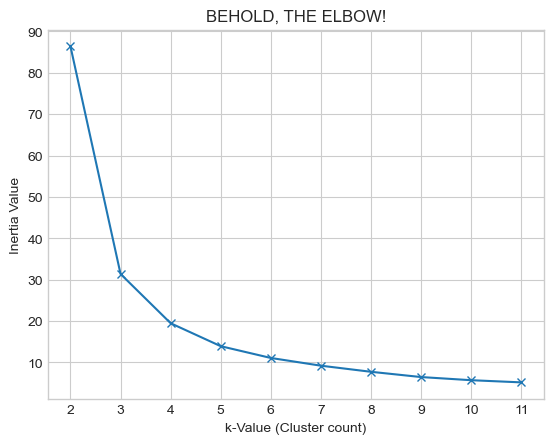

In [5]:
# Visualize that elbow doh
with plt.style.context('seaborn-whitegrid'):
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.title('BEHOLD, THE ELBOW!')
    plt.ylabel('Inertia Value')
    plt.xlabel('k-Value (Cluster count)')
    plt.xticks(range(2, 12))
    plt.show()

<b>Good value for k!</b>
- 3 or 4

---

<a id='q1d'></a>
### 1d. Repeat the clustering, this time with 3 different features.


<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1'>Question 1 Top</a></li>

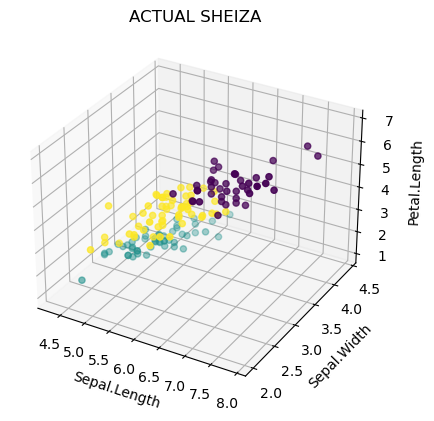

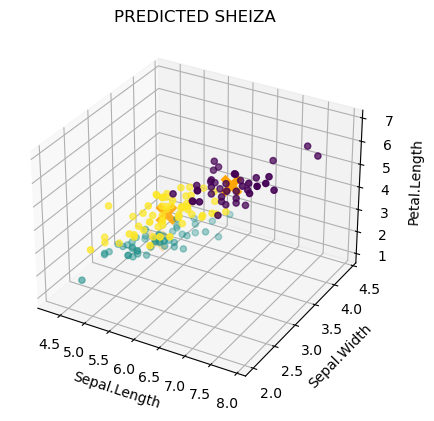

In [6]:
X2 = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length']]

# MAKE LE THING
kmeans = KMeans(n_clusters=3)

# FIT LE THING
kmeans.fit(X2)

# USE LE THING
iris['cluster2'] = kmeans.predict(X2)

# VISUALIZE LE THING
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris.iloc[:, 0], iris.iloc[:, 1], iris.iloc[:, 2], c=iris['cluster2'], cmap='viridis')
ax.set_xlabel('Sepal.Length')
ax.set_ylabel('Sepal.Width')
ax.set_zlabel('Petal.Length')
plt.title('ACTUAL SHEIZA')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2.iloc[:, 0], X2.iloc[:, 1], X2.iloc[:, 2], c=iris['cluster2'], cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=150, linewidths=5, color='orange')
ax.set_xlabel('Sepal.Length')
ax.set_ylabel('Sepal.Width')
ax.set_zlabel('Petal.Length')
plt.title('PREDICTED SHEIZA')
plt.show()

<div style='background-color: orange'>
<a id='q2'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 2
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [7]:
# Get mall data
mall = pd.read_csv('mall.csv', index_col=0)
mall.sample()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
175,176,30,88,86,1,0


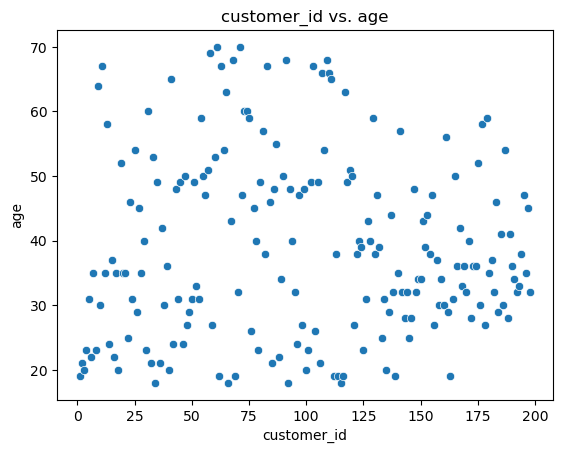

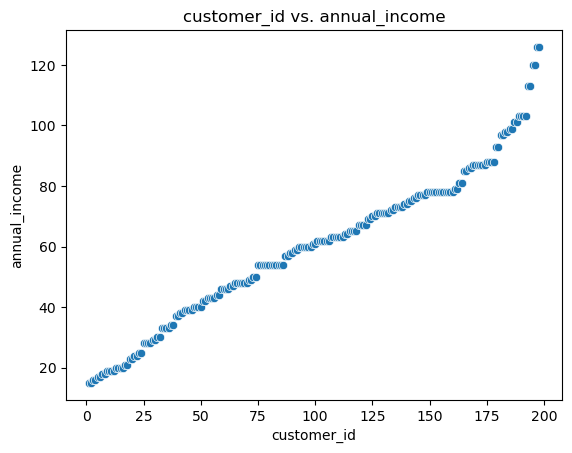

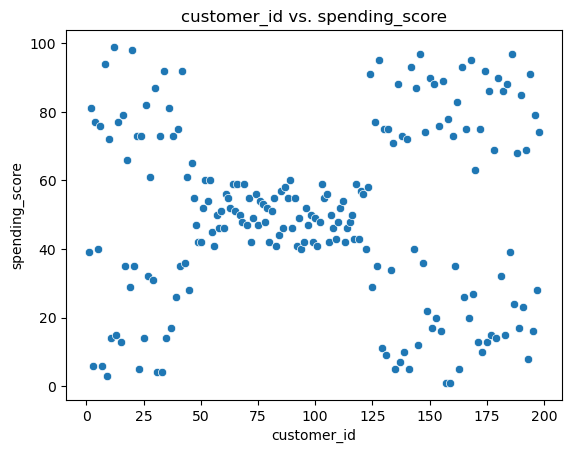

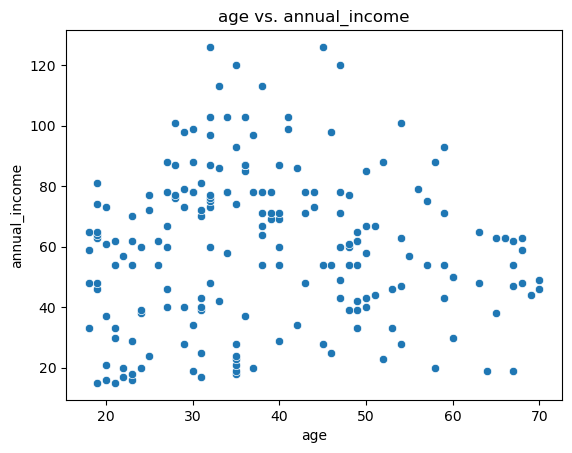

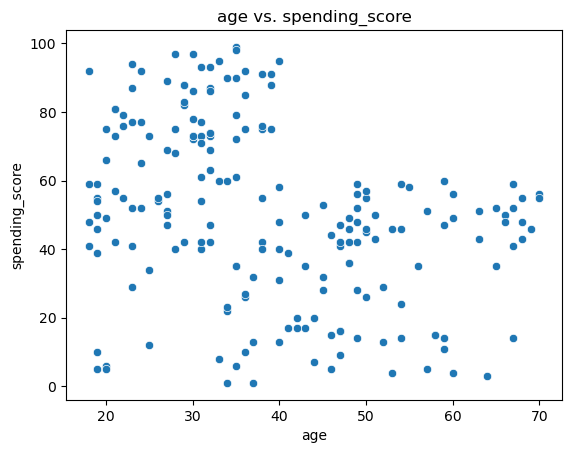

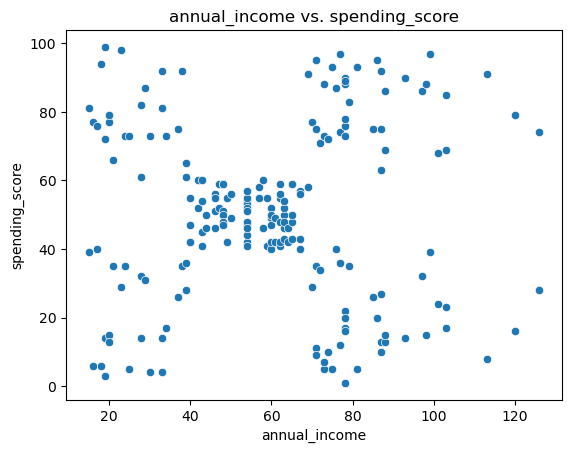

In [8]:
# Determine best combination for clustering
combos = list(itertools.combinations(mall.drop(columns=['gender_Female', 'gender_Male']).columns.to_list(), 2))
for combo in combos:
    sns.scatterplot(data=mall, x=combo[0], y=combo[1])
    plt.title(f'{combo[0]} vs. {combo[1]}')
    plt.show()

<b>Best pair:</b>
- annual_income
- spending_score

In [9]:
X_mall = mall[['annual_income', 'spending_score']]

# MAKE LE THING
kmeans = KMeans(n_clusters=2)

# FIT LE THING
kmeans.fit(X_mall)

# USE LE THING
mall['cluster'] = kmeans.predict(X_mall)

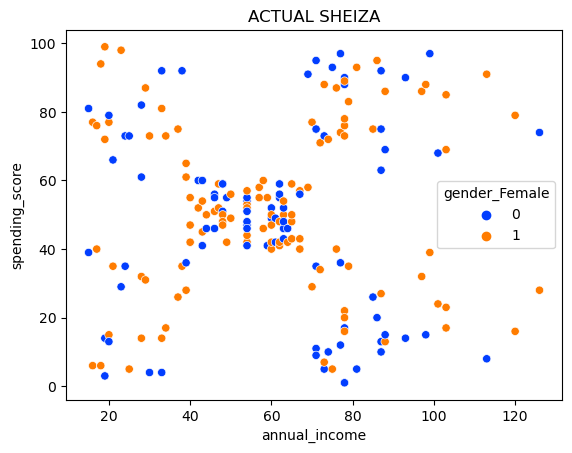

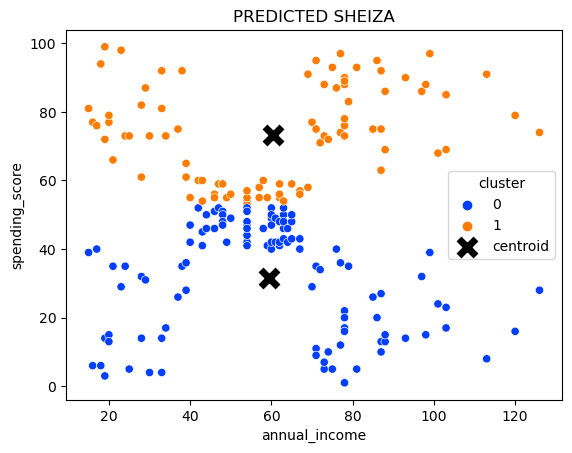

In [10]:
# VISUALIZE LE THING
sns.scatterplot(data=mall, x='annual_income', y='spending_score', hue='gender_Female', palette='bright')
plt.title('ACTUAL SHEIZA')
plt.show()
sns.scatterplot(data=mall, x='annual_income', y='spending_score', hue='cluster', palette='bright')
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_mall.columns)
centroids.plot.scatter(x='annual_income', y='spending_score', c='black', marker='x', label='centroid', s=150, linewidths=5, ax=plt.gca())
plt.title('PREDICTED SHEIZA')
plt.show()

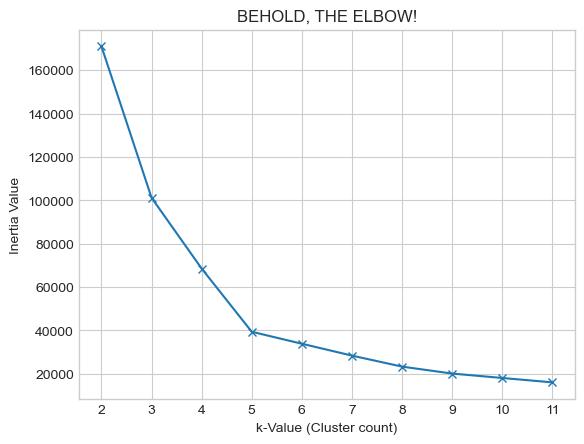

In [11]:
# Visualize that elbow doh
with plt.style.context('seaborn-whitegrid'):
    pd.Series({k: KMeans(k).fit(X_mall).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.title('BEHOLD, THE ELBOW!')
    plt.ylabel('Inertia Value')
    plt.xlabel('k-Value (Cluster count)')
    plt.xticks(range(2, 12))
    plt.show()

<b>Takeaway:</b>
It's dogshit...

<div style='background-color: orange'>
<a id='q3'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 3
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 3. How does scaling impact the results of clustering?

### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

Test scaling on:
- iris['Petal.Length']
- iris['Petal.Width']

In [12]:
# SCALE DAT SHIT!
iris_scale = iris.copy()
scaler = MinMaxScaler()
scale_cols = [
    'Petal.Length',
    'Petal.Width'
]
scaler.fit(iris_scale[scale_cols])
iris_scale[scale_cols] = scaler.transform(iris_scale[scale_cols])
iris_scale.sample()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster,cluster2
127,6.2,2.8,0.644068,0.708333,virginica,1,2


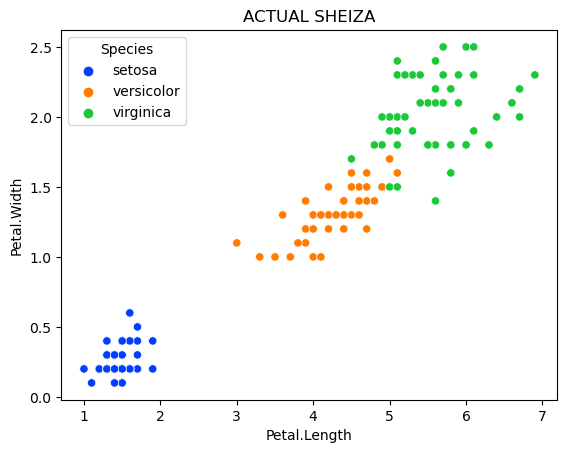

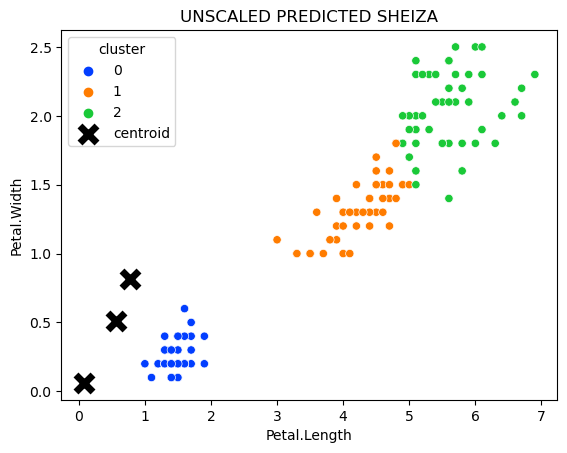

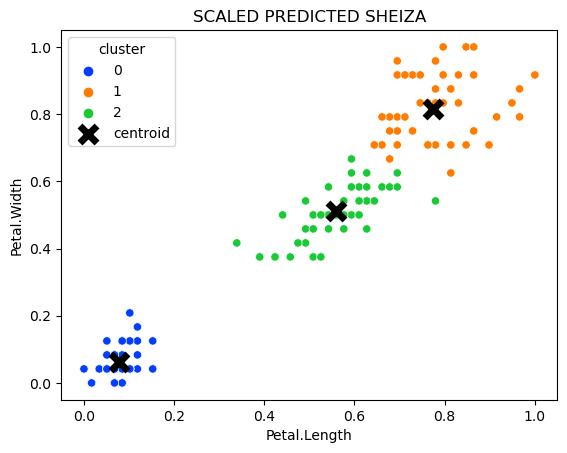

In [14]:
X_iris_scale = iris_scale[['Petal.Length', 'Petal.Width']]

# MAKE LE THING
kmeans = KMeans(n_clusters=3)

# FIT LE THING
kmeans.fit(X_iris_scale)

# USE LE THING
iris_scale['cluster'] = kmeans.predict(X_iris_scale)

# VISUALIZE LE THING
sns.scatterplot(data=iris, x='Petal.Length', y='Petal.Width', hue='Species', palette='bright')
plt.title('ACTUAL SHEIZA')
plt.show()
sns.scatterplot(data=iris, x='Petal.Length', y='Petal.Width', hue='cluster', palette='bright')
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='Petal.Length', y='Petal.Width', c='black', marker='x', label='centroid', s=150, linewidths=5, ax=plt.gca())
plt.title('UNSCALED PREDICTED SHEIZA')
plt.show()
sns.scatterplot(data=iris_scale, x='Petal.Length', y='Petal.Width', hue='cluster', palette='bright')
centroids2 = pd.DataFrame(kmeans.cluster_centers_, columns=X_iris_scale.columns)
centroids2.plot.scatter(x='Petal.Length', y='Petal.Width', c='black', marker='x', label='centroid', s=150, linewidths=5, ax=plt.gca())
plt.title('SCALED PREDICTED SHEIZA')
plt.show()

In [25]:
# Get counts of everything
setosa_actual = (iris.Species == 'setosa').sum()
versicolor_actual = (iris.Species == 'versicolor').sum()
virginica_actual = (iris.Species == 'virginica').sum()
setosa_unscale = (iris.cluster == 0).sum()
versicolor_unscale = (iris.cluster == 1).sum()
virginica_unscale = (iris.cluster == 2).sum()
setosa_scale = (iris_scale.cluster == 0).sum()
versicolor_scale = (iris_scale.cluster == 1).sum()
virginica_scale = (iris_scale.cluster == 2).sum()

# Empty dataframe of thingy
species_dict = {
    'predictor' : ['actual', 'unscaled', 'scaled'],
    'setosa_count' : [setosa_actual, setosa_unscale, setosa_scale],
    'setosa_pct' : [100, round(setosa_unscale / 50, 3), round(setosa_scale / 50, 3)],
    'versicolor_count' : [versicolor_actual, versicolor_unscale, versicolor_scale],
    'versicolor_pct' : [100, round(versicolor_unscale / 50, 3), round(versicolor_scale / 50, 3)],
    'virginica_count' : [virginica_actual, virginica_unscale, viriginica_scale],
    'virginica_pct' : [100, round(virginica_unscale / 50, 3), round(virginica_scale / 50, 3)]
    
}

In [26]:
pd.DataFrame(species_dict)

,predictor,setosa_count,setosa_pct,versicolor_count,versicolor_pct,virginica_count,virginica_pct
0,actual,50,100.0,50,100.00,50,100.00
1,unscaled,50,1.0,52,1.04,48,0.96
2,scaled,50,1.0,48,0.96,52,1.04


Judging from the above metric...
- Both scaled and unscaled generally perform the same and in this instance was just inversed for virginica and versicolor

<div style='background-color: orange'>
<a id='bonus'></a>
    <b><u><i><h1 style='text-align: center'>
        Bonus
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#bonusa'>Bonus-a</a></li>
<li><a href='#bonusb'>Bonus-b</a></li>
<li><a href='#bonusc'>Bonus-c</a></li>
<li><a href='#bonusd'>Bonus-d</a></li>
<li><a href='#bonuse'>Bonus-e</a></li>

<a id='bonusa'></a>
### Bonus-a. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#bonus'>Bonus Top</a></li>

---

<a id='bonusb'></a>
### Bonus-b. Visualize the data and guess the number and shape of the clusters.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#bonus'>Bonus Top</a></li>

---

<a id='bonusc'></a>
### Bonus-c. Implement the KMeans algorithm on unscaled data and visualize the clusters.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#bonus'>Bonus Top</a></li>

---

<a id='bonusd'></a>
### Bonus-d. Repeat the step above but with scaled data.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#bonus'>Bonus Top</a></li>

---

<a id='bonuse'></a>
### Bonus-e. Write down the takeaways from this exercise.

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#bonus'>Bonus Top</a></li>